In [ ]:
# Clone the GitHub repo
!git clone --branch Colab https://github.com/JessicaAngulo/3D_cell_segmentation_Cellpose.git
# Change into the repo folder
%cd 3D_cell_segmentation_Cellpose

1) Segmentation

In [1]:
!pip install cellpose tifffile napari[all] scikit-image

In [1]:
from Load_tiffs import Segmentator
import tifffile
import napari
import numpy as np



Welcome to CellposeSAM, cellpose v
cellpose version: 	4.0.4 
platform:       	linux 
python version: 	3.10.17 
torch version:  	2.7.0! The neural network component of
CPSAM is much larger than in previous versions and CPU excution is slow. 
We encourage users to use GPU/MPS if available. 




Select the parameters that best fit your data. 

In [2]:
segmentator = Segmentator(
    segmentation_type=2, 
    cell_diameter=100,
    model_type='cyto3',
    flow_threshold = 0.3,
    stitch_threshold = 0.1,
    skip=False,
    use_gpu=True
)

model_type argument is not used in v4.0.1+. Ignoring this argument...


In [3]:
image = segmentator.load_images()

In [4]:
masks_3d = segmentator.segmentate_image(image)

channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated in v4.0.1+. If data contain more than 3 channels, only the first 3 channels will be used
channels deprecated

In [5]:
tifffile.imwrite('cell_masks_2d.tif', masks_3d.astype(np.uint16))
tifffile.imwrite('cell_masks_2d.tif', image.astype(np.uint16))

In [6]:
viewer = napari.Viewer()
viewer.add_image(image, name='raw', channel_axis=-1)
viewer.add_labels(masks_3d, name='cell mask 3d')
napari.run()

2. Calculate cell volume and diameter. 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Exclude background (label 0)
labels = np.unique(masks_3d)
labels = labels[labels != 0]

# Count voxels per label
voxel_counts = [(label, np.sum(masks_3d == label)) for label in labels] #(label_id, voxel_count)

In [9]:
z_spacing = 1.0     # in microns (change to your actual value)
xy_spacing = 0.5    # in microns

voxel_volume_um3 = z_spacing * xy_spacing * xy_spacing

data = {
    'label': [label for label, count in voxel_counts],
    'voxel_count': [count for label, count in voxel_counts],
    'volume_um3': [count * voxel_volume_um3 for label, count in voxel_counts]
}

df = pd.DataFrame(data)
df.head()

,label,voxel_count,volume_um3
0,1,48154,12038.50
1,2,98298,24574.50
2,3,40819,10204.75
3,4,45687,11421.75
4,5,100069,25017.25


In [11]:
# Save to CSV
csv_path = 'cell_volumes.csv'
df.to_csv(csv_path, index=False)

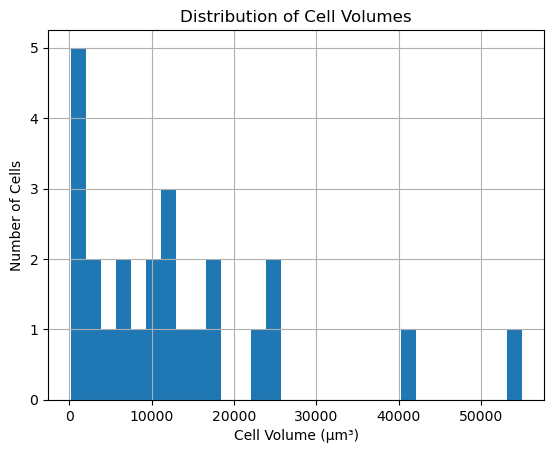

In [13]:
# Plot histogram of volumes
plt.figure()
plt.hist(df['volume_um3'], bins=30)
plt.xlabel('Cell Volume (µm³)')
plt.ylabel('Number of Cells')
plt.title('Distribution of Cell Volumes')
plt.grid(True)
plt.show()